# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [46]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import locale
import numpy as np

locale.setlocale( locale.LC_ALL, 'English_United States.1252')
# Made an assumption with that locale. Adjust as appropriate.
locale._override_localeconv = {'n_sign_posn':1}

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. Get the total rides for each city type

# 1a. We must first create an individual data from for each city type. 

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# 1b. After creating the individual data type, we can extrapolate individual ride counts

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# 1c. We then now combine by concatinating our Suburban, Rural, and Urban data frames into one df
total_riders = [suburban_ride_count, rural_ride_count, urban_ride_count]

total_rides = pd.concat(total_riders, axis=0, join="inner",
                         ignore_index=False,
                         keys=None,    
                         levels=None,
                         names=None,
                         verify_integrity=False,
                         copy=True,)

# 1d. We can now get the overall total rides for each city type
total_rides.sum()

2375

In [4]:
# Total Uburban Rides

urban_cities_df.groupby(["city"]).count()["ride_id"].sum()

1625

In [5]:
# Total Rural Rides
rural_cities_df.groupby(["city"]).count()["ride_id"].sum()

125

In [6]:
# Total Suburban Rides
suburban_cities_df.groupby(["city"]).count()["ride_id"].sum()

625

In [7]:
# 2. Get the total drivers for each city type

# 2a. Create individual data frames for driver counts

urban_cities_df = city_data_df[city_data_df["type"] == "Urban"]
suburban_cities_df = city_data_df[city_data_df["type"] == "Suburban"]
rural_cities_df = city_data_df[city_data_df["type"] == "Rural"]

# 2b. Extrapolate individual ride counts

suburban_driver_count = suburban_cities_df['driver_count']
rural_driver_count = rural_cities_df['driver_count']
urban_driver_count = urban_cities_df['driver_count']

# 2c. We then now combine by concatinating our Suburban, Rural, and Urban data frames into one df
total_driver = [suburban_driver_count, rural_driver_count, urban_driver_count]

total_drivers = pd.concat(total_driver, axis=0, join="outer",
                         ignore_index=False,
                         keys=None,    
                         levels=None,
                         names=None,
                         verify_integrity=False,
                         copy=True,)

# 2c. We can now get the overall total drivers for each city type
total_drivers.sum()

2973

In [8]:
# Total Uburban Drivers

urban_cities_df['driver_count'].sum()

2405

In [9]:
# Total Rural Drivers

rural_cities_df['driver_count'].sum()

78

In [10]:
# Total Suburban Drivers

suburban_cities_df['driver_count'].sum()

490

In [11]:
# 3. Get the sum of the fares for each city type

sum_urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
sum_suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
sum_rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# 4a. After creating the individual data type, we can extrapolate average fares

suburban_sum_fare = sum_suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_sum_fare = sum_rural_cities_df.groupby(["city"]).sum()["fare"]
urban_sum_fare = sum_urban_cities_df.groupby(["city"]).sum()["fare"]

# 4c. We then now combine by concatinating our Suburban, Rural, and Urban data frames into one df

sum_fares = [suburban_sum_fare, rural_sum_fare, urban_sum_fare]

sum_fare = pd.concat(sum_fares, axis=0, join="outer",
                         ignore_index=False,
                         keys=None,    
                         levels=None,
                         names=None,
                         verify_integrity=False,
                         copy=True,)

# 2d. We can now get the overall total fares for each city type
print(f"${round(sum_fare.sum(),2)}")

$63538.64


In [12]:
# Total Sum for Suburban Rides

print(f"${round(suburban_sum_fare.sum(),2)}")

$19356.33


In [13]:
# Total Sum for Urban Rides

print(f"${round(urban_sum_fare.sum(),2)}")

$39854.38


In [14]:
# Total Sum for Rural Rides

print(f"${round(rural_sum_fare.sum(),2)}")

$4327.93


In [15]:
# 4. Get the average fare ride for each city type

fare_urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
fare_suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
fare_rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# 4a. After creating the individual data type, we can extrapolate average fares

suburban_avg_fare = fare_suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = fare_rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare = fare_urban_cities_df.groupby(["city"]).mean()["fare"]

# 4c. We then now combine by concatinating our Suburban, Rural, and Urban data frames into one df

avg_fares = [suburban_avg_fare, rural_avg_fare, urban_avg_fare]

avg_fare = pd.concat(avg_fares, axis=0, join="outer",
                         ignore_index=False,
                         keys=None,    
                         levels=None,
                         names=None,
                         verify_integrity=False,
                         copy=True,)

# 2d. We can now get the overall average fares for each city type
print(f"${round(avg_fare.mean(),2)}")

$27.89


In [16]:
# Average fare for Suburban Rides

print(f"${round(suburban_avg_fare.mean(),2)}")

$30.74


In [17]:
# Average fare for Urban Rides

print(f"${round(urban_avg_fare.mean(),2)}")

$24.5


In [18]:
# Average fare for Rural Rides

print(f"${round(rural_avg_fare.mean(),2)}")

$34.64


In [19]:
# 5. Get the average fare per driver for each city type. 

urban_cities_df = city_data_df[city_data_df["type"] == "Urban"]
suburban_cities_df = city_data_df[city_data_df["type"] == "Suburban"]
rural_cities_df = city_data_df[city_data_df["type"] == "Rural"]

# 5a. Extrapolate individual ride counts

suburban_driver_count = suburban_cities_df['driver_count']
rural_driver_count = rural_cities_df['driver_count']
urban_driver_count = urban_cities_df['driver_count']

# 5b. Find the average fare per driver 

driver_suburban_avg_fare = (fare_suburban_cities_df.groupby(["city"]).sum()["fare"] / suburban_driver_count.count())
driver_rural_avg_fare = (fare_rural_cities_df.groupby(["city"]).sum()["fare"] / rural_driver_count.count())
driver_urban_avg_fare = (fare_urban_cities_df.groupby(["city"]).sum()["fare"] / urban_driver_count.count())

# 5c. We then now combine by concatinating our Suburban, Rural, and Urban data frames into one df

avg_driver_fares = [driver_suburban_avg_fare, driver_rural_avg_fare, driver_urban_avg_fare]

avg_driver_fare = pd.concat(avg_driver_fares, axis=0, join="outer",
                         ignore_index=False,
                         keys=None,    
                         levels=None,
                         names=None,
                         verify_integrity=False,
                         copy=True,)

# 5d. We can now get the overall average fares per driver for each city type
print(f"${round(avg_driver_fare.mean(),2)}")

$11.52


In [20]:
# Average fare per driver for Suburban city type

print(f"${round(driver_suburban_avg_fare.mean(),2)}")

$14.94


In [21]:
# Average fare per driver for Urburban city type

print(f"${round(driver_urban_avg_fare.mean(),2)}")

$9.15


In [22]:
# Average fare per driver for Rural city type

print(f"${round(driver_rural_avg_fare.mean(),2)}")

$13.36


In [23]:
#  6. Create a PyBer summary DataFrame. 

summary_df = pyber_data_df.describe()
summary_df

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


In [24]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_data_df.index.name = None
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [25]:
#  8. Format the columns.
pyber_data_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]

pyber_data_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [26]:
# 8a. More formatting

pyber_data_df = pyber_data_df.reset_index()
pyber_data_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [41]:
# 8d. Finding fares between date range: 2019-01-01 through 2019-04-28

fare_range = pyber_data_df.loc[pyber_data_df['date'].between("2019-01-01","2019-04-28")]

fare_range 

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2172,2019-04-27 17:58:27,Rural,14.01
2173,2019-04-27 19:45:48,Suburban,28.84
2174,2019-04-27 20:41:36,Urban,8.28
2175,2019-04-27 23:26:03,Urban,19.06


In [43]:
# 8b. Creating the pivot

pivot_fare_range = fare_range.pivot(index="date", columns="type", values="fare")
pivot_fare_range

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [44]:
# Checking the datetime data type
pivot_fare_range.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0+ KB


In [45]:
# 8c. Creating a pivot table for the weekly fares

pivot_fare_range.index = pd.to_datetime(pivot_fare_range.index)
pivot_fare_range = pivot_fare_range.resample("W").sum()
pivot_fare_range


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


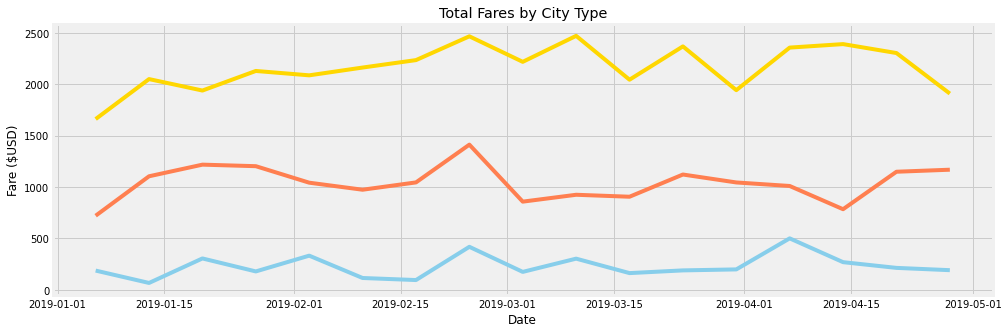

<Figure size 432x288 with 0 Axes>

In [85]:
# Graphing the data

x = pivot_fare_range.index
y1 = pivot_fare_range["Rural"]
y2 = pivot_fare_range["Suburban"]
y3 = pivot_fare_range["Urban"]

plt.figure(num = 1, figsize=(15, 5))
plt.plot(x, y3, color='gold')
plt.plot(x, y2, color='coral')
plt.plot(x, y1, color='skyblue')



plt.xlabel("Date")
plt.ylabel("Fare ($USD)")
plt.title("Total Fares by City Type")

plt.show()
plt.savefig("analysis/PyBer_fare_summary.png")

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [30]:
# 1. Read the merged DataFrame


In [31]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.


In [32]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()


In [33]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 


In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.



In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

In [36]:
# 7. Check that the datatype for the index is datetime using df.info()


In [37]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.


In [38]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

